In [76]:
#Here we do PCA for the nodes and their feature vectors made out of sentences using Node2Vec
#To see if these feature vectors are indeed useful and they form certain groups

import json
import random
import numpy as np
from collections import Counter
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from gensim.models.word2vec import Word2Vec

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Datathon\ 2022\ -\ RichB\ Fan\ Club/Data/Training

Mounted at /content/drive
/content/drive/Shareddrives/Datathon 2022 - RichB Fan Club/Data/Training


In [92]:
#loading data
isolated_nodes = pd.read_csv("isolated_nodes.csv")
node_classification = pd.read_csv("node_classification.csv")      #there are 4 unique page types
training_graph = pd.read_csv("training_graph.csv")
with open('node_features_text.json') as f:
   node_features_text = json.load(f)
word2vec_features = pd.read_csv('word2vec_features.csv')

In [78]:
#Here I convert the pandas data fram with the features as horizontal vectors for each node,
#and node i corresponds to the i-th id node 
w2v = np.array(word2vec_features)
w2v

array([[ 0.00000000e+00,  1.20001897e+00,  3.77620463e-01, ...,
        -5.06243282e-02,  1.48253411e+00,  1.93178660e-01],
       [ 1.00000000e+00,  1.00825248e+00,  7.61019006e-01, ...,
         2.96545524e-01,  1.29665786e+00,  3.88547603e-01],
       [ 2.00000000e+00, -2.02412395e-01, -4.08896225e-01, ...,
        -4.31093427e-02, -9.13542201e-01, -2.07164278e-02],
       ...,
       [ 2.24670000e+04,  7.73699105e-01,  5.85787654e-01, ...,
         6.73406894e-02,  1.23000675e+00,  2.92622961e-01],
       [ 2.24680000e+04,  2.71879293e-01,  3.08001550e-01, ...,
        -1.20122239e-01,  7.93196680e-01, -2.09847678e-01],
       [ 2.24690000e+04,  4.30348982e-01,  4.75214887e-01, ...,
        -7.16106454e-03,  8.49210833e-01, -7.06880470e-03]])

In [ ]:
#Preprocess all the data to be acceptable for the PCA analysis, we have matrix
#with row number as nodes in order of their ids, and horizontal feature vectors
#containing the feature in Node2Vec format
NCA = np.array(node_classification)
print(np.shape(NCA))
print(np.shape(w2v))
k=0
temp=np.empty((2,100))
for i in w2v:
  if k>1:
    break;
  else:
    temp[0] = i[1:]
    k = k+1
print(temp)

In [ ]:
#Drop the column with IDs of the nodes
print(word2vec_features)
word2vec_features.drop(word2vec_features.columns[0], axis=1, inplace = True)
print(word2vec_features)

arr = np.array(word2vec_features)

In [ ]:
#Another way to drop the column with IDS of the nodes
NCC = np.empty((22470, 100))
percent = 0
for i in w2v:
  print(i)
  #NCC.append(i[1:])
  percent = percent + 1
  print(percent)
  np.append(NCC, i[1:])
print(NCC)

In [ ]:
print(NCC[0])

In [ ]:
print(word2vec_features)

In [45]:
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA

In [46]:
# Fit word2vec model (Skip-Gram Model)
word_2_vec_ex = NCC

In [ ]:
print(NCA)
word_list_str = []
for i in NCA:
  word_list_str.append(str(i[0]))
print(word_list_str)

In [83]:
#Do pca on the preprocessed data
pca_w2v = PCA(n_components = 2).fit_transform(arr)

In [ ]:
print(NCC)

In [ ]:
print(node_classification)
node_classification.drop(node_classification.columns[0], axis=1, inplace = True)
print(node_classification)
clr = np.array(node_classification)
#assign the colors, such that for i-th element is number from 1 to 4
#symbolizing the assigment to page type. Then convert numbers to colors
#to use in the plot
print(clr)

In [ ]:
#Change numbers of page types to colors.

print(np.shape(clr))
clrs = []
for i in clr:
  print(i[0])
  if i[0] == 1:
    clrs.append('red')
  if i[0] == 2:
    clrs.append('green')
  if i[0] == 3:
    clrs.append('blue')
  if i[0] == 4:
    clrs.append('black')
print(clrs)

22470


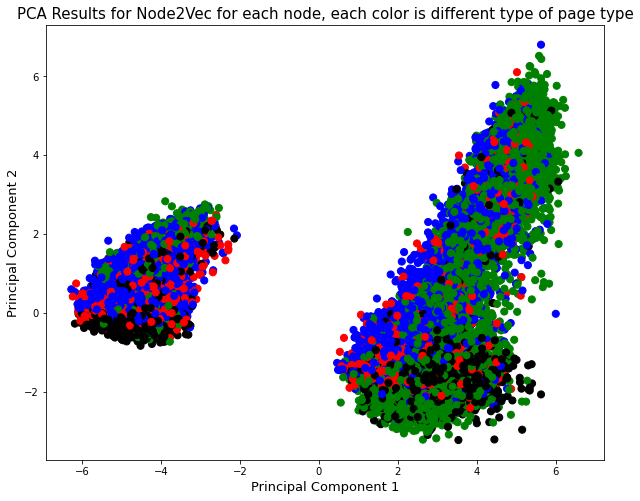

In [108]:
# Plot PCA
print(len(pca_w2v))
fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(x = pca_w2v[:, 0], y = pca_w2v[:, 1], s = 50, c = clrs)
plt.title('PCA Results for Node2Vec for each node, each color is different type of page type', fontsize = 15)
plt.xlabel('Principal Component 1', fontsize = 13)
plt.ylabel('Principal Component 2', fontsize = 13)
plt.show()

In [ ]:
#PCA for the words is in another file: PCAWords.ipynb 